In [4]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [5]:
from pytrends.request import TrendReq
import pandas as pd
import time
import random
import itertools

# -----------------------------------------------------
# 1. Setup
# -----------------------------------------------------
pytrends = TrendReq(hl='en-US', tz=360)

# Your optimized fragrance keyword list
keywords = [
    # Perfume market
    "perfume", "oud perfume", "arabian perfume", "luxury perfume",
    "niche perfume", "long lasting perfume", "best perfume 2024",
    "attars", "arabian oud", "lattafa perfume", "oriental perfume", "unisex perfume",

    # Natural / Clean Beauty
    "natural perfume", "organic perfume", "clean beauty", "non toxic beauty",
    "natural cosmetics", "paraben free perfume", "vegan perfume", 
    "plant based perfume", "essential oil perfume",

    # GCC region
    "perfume UAE", "perfume Saudi Arabia", "perfume Qatar",
    "perfume Kuwait", "perfume Oman", "perfume Bahrain",
    "oud UAE", "luxury perfume Dubai", "arabian oud Riyadh",
    "attars Saudi Arabia",

    # Social media trends
    "perfume TikTok", "viral perfume", "perfume influencer",
    "perfume review", "TikTok perfume trend"
]

# -----------------------------------------------------
# 2. Split into batches of 5 (Google Trends limit)
# -----------------------------------------------------
def batch_keywords(keyword_list, batch_size=5):
    for i in range(0, len(keyword_list), batch_size):
        yield keyword_list[i:i + batch_size]

batches = list(batch_keywords(keywords, 5))
print(f"Total batches: {len(batches)}")

# -----------------------------------------------------
# 3. Fetch trends safely for each batch
# -----------------------------------------------------
all_trends = []

for idx, batch in enumerate(batches, start=1):
    print(f"\n📌 Fetching batch {idx}/{len(batches)} → {batch}")

    try:
        pytrends.build_payload(
            batch,
            cat=0,
            timeframe="2018-01-01 2025-01-01",
            geo="",      # worldwide; you can set "SA", "AE" etc.
            gprop=""
        )

        df = pytrends.interest_over_time()

        if df.empty:
            print("⚠ Empty result for batch — skipping.")
            continue

        df = df.drop(columns=["isPartial"], errors="ignore")
        all_trends.append(df)

        print("✅ Success")

    except Exception as e:
        print(f"❌ Error fetching batch {idx}: {e}")

    # SAFE COOLDOWN (prevent Google rate-limit)
    sleep_time = random.uniform(2, 6)
    print(f"⏳ Sleeping {sleep_time:.2f} seconds...")
    time.sleep(sleep_time)

# -----------------------------------------------------
# 4. Merge all results
# -----------------------------------------------------
if len(all_trends) == 0:
    raise ValueError("No trend data collected.")

merged_df = pd.concat(all_trends, axis=1)

# Remove duplicate index/columns
merged_df = merged_df.groupby(level=0).last()
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# -----------------------------------------------------
# 5. Save to CSV
# -----------------------------------------------------
output_path = "perfume_google_trends.csv"
merged_df.to_csv(output_path)

print(f"\n🎉 DONE! CSV saved as: {output_path}")
print(f"Total columns collected: {merged_df.shape[1]}")


Total batches: 8

📌 Fetching batch 1/8 → ['perfume', 'oud perfume', 'arabian perfume', 'luxury perfume', 'niche perfume']
✅ Success
⏳ Sleeping 3.20 seconds...

📌 Fetching batch 2/8 → ['long lasting perfume', 'best perfume 2024', 'attars', 'arabian oud', 'lattafa perfume']
✅ Success
⏳ Sleeping 3.94 seconds...

📌 Fetching batch 3/8 → ['oriental perfume', 'unisex perfume', 'natural perfume', 'organic perfume', 'clean beauty']
✅ Success
⏳ Sleeping 2.27 seconds...

📌 Fetching batch 4/8 → ['non toxic beauty', 'natural cosmetics', 'paraben free perfume', 'vegan perfume', 'plant based perfume']
✅ Success
⏳ Sleeping 3.35 seconds...

📌 Fetching batch 5/8 → ['essential oil perfume', 'perfume UAE', 'perfume Saudi Arabia', 'perfume Qatar', 'perfume Kuwait']
✅ Success
⏳ Sleeping 4.26 seconds...

📌 Fetching batch 6/8 → ['perfume Oman', 'perfume Bahrain', 'oud UAE', 'luxury perfume Dubai', 'arabian oud Riyadh']
✅ Success
⏳ Sleeping 2.94 seconds...

📌 Fetching batch 7/8 → ['attars Saudi Arabia', 'perfu

In [49]:
import pandas as pd
df = pd.read_csv("perfume_google_trends.csv", parse_dates=["date"])
display(df)

,date,perfume,oud perfume,arabian perfume,luxury perfume,niche perfume,long lasting perfume,best perfume 2024,attars,arabian oud,...,perfume Bahrain,oud UAE,luxury perfume Dubai,arabian oud Riyadh,attars Saudi Arabia,perfume TikTok,viral perfume,perfume influencer,perfume review,TikTok perfume trend
0,2018-01-01,26,0,0,0,0,3,0,1,6,...,16,18,0,0,0,0,0,0,52,0
1,2018-02-01,27,0,0,0,0,4,0,1,6,...,17,17,0,0,0,0,0,0,55,0
2,2018-03-01,25,0,0,0,0,4,0,1,6,...,20,23,0,0,0,0,0,0,50,0
3,2018-04-01,26,0,0,0,0,4,0,1,6,...,21,23,0,0,0,0,0,0,49,0
4,2018-05-01,28,0,0,0,0,4,0,1,6,...,17,23,0,0,0,0,0,0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2024-09-01,63,1,0,0,0,17,9,2,33,...,57,73,5,10,0,7,4,1,65,0
81,2024-10-01,68,1,0,0,0,18,10,2,32,...,59,100,8,0,0,9,4,1,73,0
82,2024-11-01,78,1,0,0,0,19,15,2,36,...,61,80,7,0,0,10,5,1,83,0
83,2024-12-01,100,1,0,0,0,19,19,2,39,...,69,77,9,0,0,12,5,1,100,0


In [50]:
duplicates = {"df": df.duplicated().sum()}

duplicates

{'df': np.int64(0)}

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
nullvalues = {"df": df.isna().sum()}

nullvalues

{'df': date                     0
 perfume                  0
 oud perfume              0
 arabian perfume          0
 luxury perfume           0
 niche perfume            0
 long lasting perfume     0
 best perfume 2024        0
 attars                   0
 arabian oud              0
 lattafa perfume          0
 oriental perfume         0
 unisex perfume           0
 natural perfume          0
 organic perfume          0
 clean beauty             0
 non toxic beauty         0
 natural cosmetics        0
 paraben free perfume     0
 vegan perfume            0
 plant based perfume      0
 essential oil perfume    0
 perfume UAE              0
 perfume Saudi Arabia     0
 perfume Qatar            0
 perfume Kuwait           0
 perfume Oman             0
 perfume Bahrain          0
 oud UAE                  0
 luxury perfume Dubai     0
 arabian oud Riyadh       0
 attars Saudi Arabia      0
 perfume TikTok           0
 viral perfume            0
 perfume influencer       0
 perfume revie

In [53]:
df.columns

Index(['date', 'perfume', 'oud perfume', 'arabian perfume', 'luxury perfume',
       'niche perfume', 'long lasting perfume', 'best perfume 2024', 'attars',
       'arabian oud', 'lattafa perfume', 'oriental perfume', 'unisex perfume',
       'natural perfume', 'organic perfume', 'clean beauty',
       'non toxic beauty', 'natural cosmetics', 'paraben free perfume',
       'vegan perfume', 'plant based perfume', 'essential oil perfume',
       'perfume UAE', 'perfume Saudi Arabia', 'perfume Qatar',
       'perfume Kuwait', 'perfume Oman', 'perfume Bahrain', 'oud UAE',
       'luxury perfume Dubai', 'arabian oud Riyadh', 'attars Saudi Arabia',
       'perfume TikTok', 'viral perfume', 'perfume influencer',
       'perfume review', 'TikTok perfume trend'],
      dtype='object')

In [54]:
df.isna().sum()

date                     0
perfume                  0
oud perfume              0
arabian perfume          0
luxury perfume           0
niche perfume            0
long lasting perfume     0
best perfume 2024        0
attars                   0
arabian oud              0
lattafa perfume          0
oriental perfume         0
unisex perfume           0
natural perfume          0
organic perfume          0
clean beauty             0
non toxic beauty         0
natural cosmetics        0
paraben free perfume     0
vegan perfume            0
plant based perfume      0
essential oil perfume    0
perfume UAE              0
perfume Saudi Arabia     0
perfume Qatar            0
perfume Kuwait           0
perfume Oman             0
perfume Bahrain          0
oud UAE                  0
luxury perfume Dubai     0
arabian oud Riyadh       0
attars Saudi Arabia      0
perfume TikTok           0
viral perfume            0
perfume influencer       0
perfume review           0
TikTok perfume trend     0
d

In [55]:
df.dropna(inplace=True)

In [56]:
df.isna().sum().sort_values(ascending=False)
df.fillna(0, inplace=True)

In [57]:
df

,date,perfume,oud perfume,arabian perfume,luxury perfume,niche perfume,long lasting perfume,best perfume 2024,attars,arabian oud,...,perfume Bahrain,oud UAE,luxury perfume Dubai,arabian oud Riyadh,attars Saudi Arabia,perfume TikTok,viral perfume,perfume influencer,perfume review,TikTok perfume trend
0,2018-01-01,26,0,0,0,0,3,0,1,6,...,16,18,0,0,0,0,0,0,52,0
1,2018-02-01,27,0,0,0,0,4,0,1,6,...,17,17,0,0,0,0,0,0,55,0
2,2018-03-01,25,0,0,0,0,4,0,1,6,...,20,23,0,0,0,0,0,0,50,0
3,2018-04-01,26,0,0,0,0,4,0,1,6,...,21,23,0,0,0,0,0,0,49,0
4,2018-05-01,28,0,0,0,0,4,0,1,6,...,17,23,0,0,0,0,0,0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2024-09-01,63,1,0,0,0,17,9,2,33,...,57,73,5,10,0,7,4,1,65,0
81,2024-10-01,68,1,0,0,0,18,10,2,32,...,59,100,8,0,0,9,4,1,73,0
82,2024-11-01,78,1,0,0,0,19,15,2,36,...,61,80,7,0,0,10,5,1,83,0
83,2024-12-01,100,1,0,0,0,19,19,2,39,...,69,77,9,0,0,12,5,1,100,0


In [58]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [59]:
# Drop rows where date_time failed conversion
df = df.dropna(subset=['date'])

In [60]:
df = df.set_index("date").sort_index()

In [61]:
# Convert to Weekly frequency
#df = df.asfreq("W")

# Interpolate missing values
df = df.interpolate(method="linear")

In [62]:
df

,perfume,oud perfume,arabian perfume,luxury perfume,niche perfume,long lasting perfume,best perfume 2024,attars,arabian oud,lattafa perfume,...,perfume Bahrain,oud UAE,luxury perfume Dubai,arabian oud Riyadh,attars Saudi Arabia,perfume TikTok,viral perfume,perfume influencer,perfume review,TikTok perfume trend
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,26,0,0,0,0,3,0,1,6,0,...,16,18,0,0,0,0,0,0,52,0
2018-02-01,27,0,0,0,0,4,0,1,6,0,...,17,17,0,0,0,0,0,0,55,0
2018-03-01,25,0,0,0,0,4,0,1,6,0,...,20,23,0,0,0,0,0,0,50,0
2018-04-01,26,0,0,0,0,4,0,1,6,0,...,21,23,0,0,0,0,0,0,49,0
2018-05-01,28,0,0,0,0,4,0,1,6,0,...,17,23,0,0,0,0,0,0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,63,1,0,0,0,17,9,2,33,62,...,57,73,5,10,0,7,4,1,65,0
2024-10-01,68,1,0,0,0,18,10,2,32,72,...,59,100,8,0,0,9,4,1,73,0
2024-11-01,78,1,0,0,0,19,15,2,36,84,...,61,80,7,0,0,10,5,1,83,0


In [63]:
flat_columns = [col for col in df.columns if df[col].max() == 0]
flat_columns

['arabian perfume', 'luxury perfume', 'niche perfume', 'attars Saudi Arabia']

In [64]:
# Automatically detect flatline columns
flat_columns = [col for col in df.columns if df[col].std() < 1e-3]
print("Flatline columns detected:", flat_columns)

# Drop flatline columns
df = df.drop(columns=flat_columns)
print("Remaining columns:", df.columns.tolist())

Flatline columns detected: ['arabian perfume', 'luxury perfume', 'niche perfume', 'attars Saudi Arabia']
Remaining columns: ['perfume', 'oud perfume', 'long lasting perfume', 'best perfume 2024', 'attars', 'arabian oud', 'lattafa perfume', 'oriental perfume', 'unisex perfume', 'natural perfume', 'organic perfume', 'clean beauty', 'non toxic beauty', 'natural cosmetics', 'paraben free perfume', 'vegan perfume', 'plant based perfume', 'essential oil perfume', 'perfume UAE', 'perfume Saudi Arabia', 'perfume Qatar', 'perfume Kuwait', 'perfume Oman', 'perfume Bahrain', 'oud UAE', 'luxury perfume Dubai', 'arabian oud Riyadh', 'perfume TikTok', 'viral perfume', 'perfume influencer', 'perfume review', 'TikTok perfume trend']


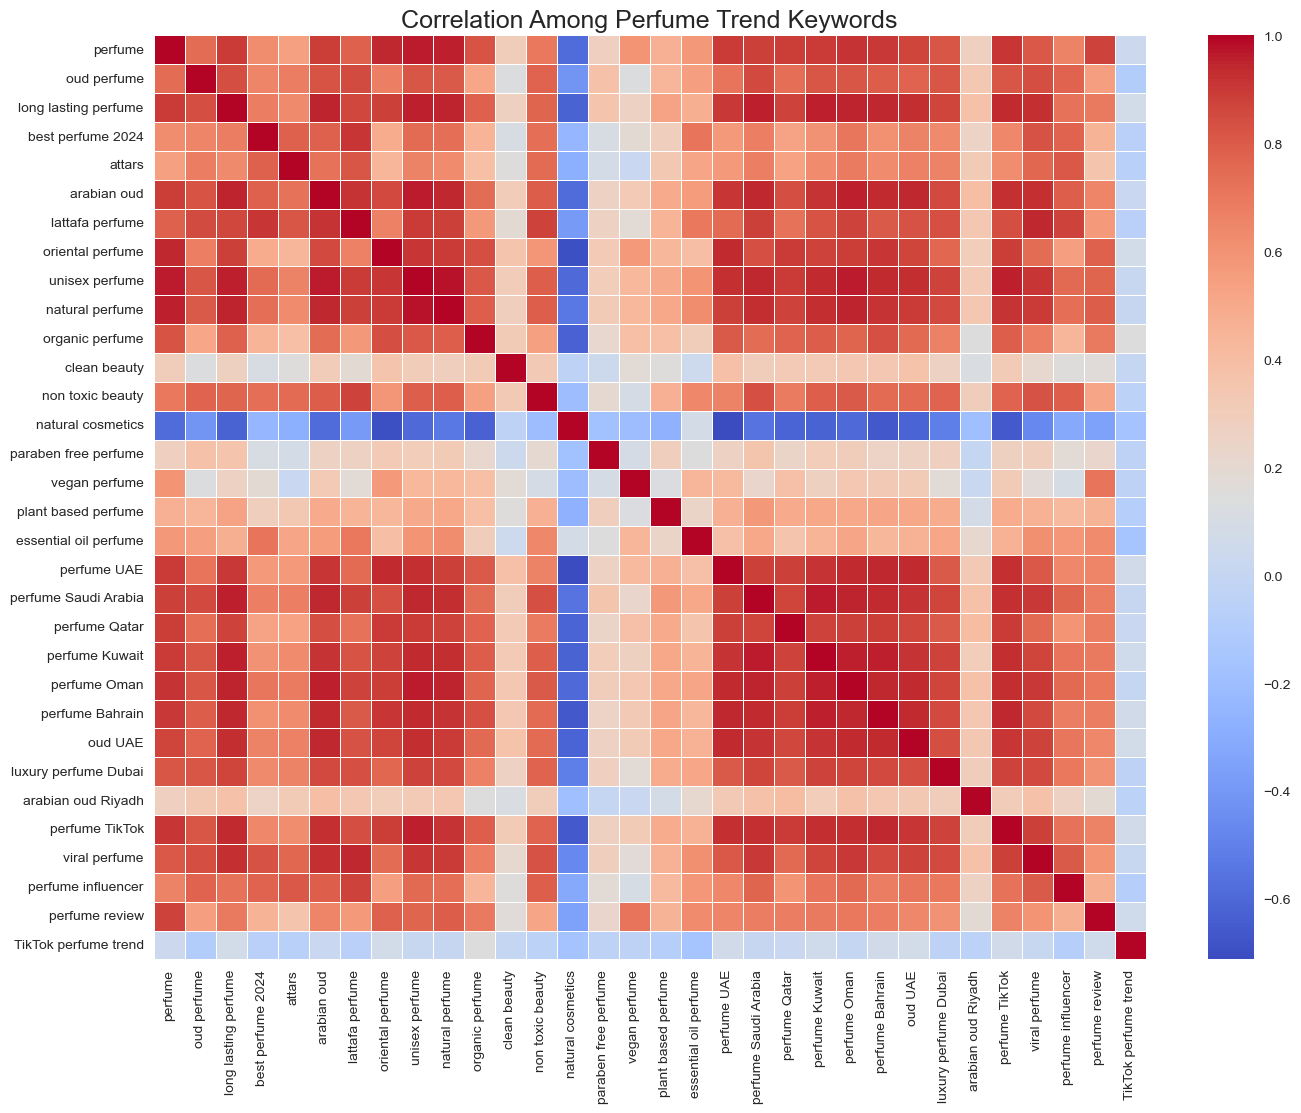

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

plt.style.use("seaborn-v0_8")
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Among Perfume Trend Keywords", fontsize=18)
plt.show()


In [68]:
# Trend Features (mean, median, max, volatility, growth_rate, peak_month)
trend_features = pd.DataFrame()
for col in df.columns:
    ts = df[col]
    trend_features.loc[col, "mean_demand"] = ts.mean()
    trend_features.loc[col, "median_demand"] = ts.median()
    trend_features.loc[col, "max_demand"] = ts.max()
    trend_features.loc[col, "volatility"] = ts.std()
    trend_features.loc[col, "growth_rate"] = (ts[-1] - ts[0]) / ts[0] if ts[0] != 0 else 0

    # Seasonality: average score by month
    ts_monthly = ts.groupby(ts.index.month).mean()
    trend_features.loc[col, "peak_month"] = ts_monthly.idxmax()

trend_features

C:\Users\rahal\AppData\Local\Temp\ipykernel_11968\3267621899.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_features.loc[col, "growth_rate"] = (ts[-1] - ts[0]) / ts[0] if ts[0] != 0 else 0
C:\Users\rahal\AppData\Local\Temp\ipykernel_11968\3267621899.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_features.loc[col, "growth_rate"] = (ts[-1] - ts[0]) / ts[0] if ts[0] != 0 else 0
C:\Users\rahal\AppData\Local\Temp\ipykernel_11968\3267621899.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

,mean_demand,median_demand,max_demand,volatility,growth_rate,peak_month
perfume,44.552941,42.0,100.0,16.784705,1.500000,12.0
oud perfume,0.258824,0.0,1.0,0.440588,0.000000,12.0
long lasting perfume,8.458824,7.0,19.0,4.425448,3.666667,12.0
best perfume 2024,1.341176,0.0,19.0,3.486549,0.000000,12.0
attars,1.164706,1.0,2.0,0.373116,1.000000,1.0
arabian oud,15.000000,14.0,39.0,7.596992,4.166667,12.0
lattafa perfume,13.835294,2.0,100.0,22.937206,0.000000,12.0
oriental perfume,11.835294,12.0,20.0,3.497778,1.142857,12.0
unisex perfume,20.235294,16.0,62.0,11.676846,3.875000,12.0
natural perfume,30.200000,28.0,56.0,7.662214,0.954545,12.0


In [73]:
# Handle NaN in growth_rate (replace with 0)
trend_features["growth_rate"] = trend_features["growth_rate"].fillna(0)

# Separate scaling
numeric_cols = ["mean_demand", "median_demand", "max_demand", "volatility"]

scaler = MinMaxScaler()
trend_features_scaled = trend_features.copy()
trend_features_scaled[numeric_cols] = scaler.fit_transform(trend_features_scaled[numeric_cols])

# Scale growth_rate separately
growth_rate = trend_features[["growth_rate"]].copy()
growth_rate_scaled = (growth_rate - growth_rate.min()) / (growth_rate.max() - growth_rate.min())
trend_features_scaled["growth_rate"] = growth_rate_scaled

trend_features_scaled

,mean_demand,median_demand,max_demand,volatility,growth_rate,peak_month
perfume,0.572948,0.545455,1.000000,0.727332,0.290130,12.0
oud perfume,0.000760,0.000000,0.000000,0.002990,0.023928,12.0
long lasting perfume,0.106687,0.090909,0.181818,0.179592,0.674643,12.0
best perfume 2024,0.014742,0.000000,0.181818,0.137982,0.023928,12.0
attars,0.012462,0.012987,0.010101,0.000000,0.201396,1.0
arabian oud,0.191185,0.181818,0.383838,0.320149,0.763377,12.0
lattafa perfume,0.176140,0.025974,1.000000,1.000000,0.023928,12.0
oriental perfume,0.150304,0.155844,0.191919,0.138479,0.226748,12.0
unisex perfume,0.258815,0.207792,0.616162,0.500961,0.711615,12.0
natural perfume,0.387538,0.363636,0.555556,0.323040,0.193329,12.0


In [ ]:
# Save cleaned and scaled dataset
df.to_csv("perfume_google_trends_clean.csv")
trend_features_scaled.to_csv("perfume_trend_features_scaled.csv")

print("✅ Cleaned and scaled datasets saved!")
print(" - perfume_google_trends_clean.csv")
print(" - perfume_trend_features_scaled.csv")

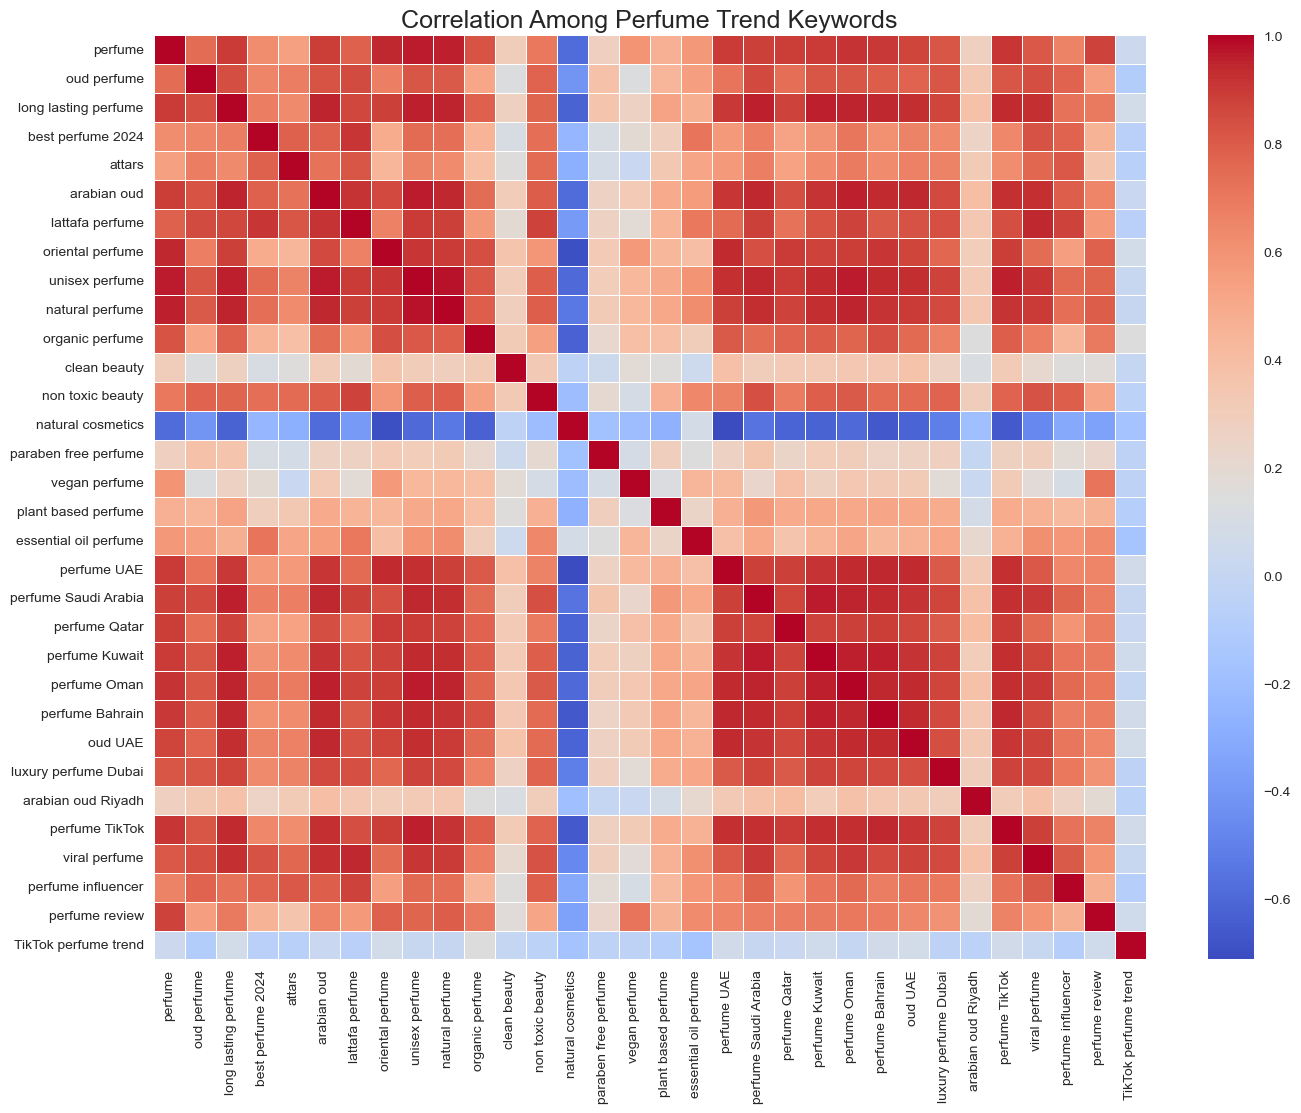

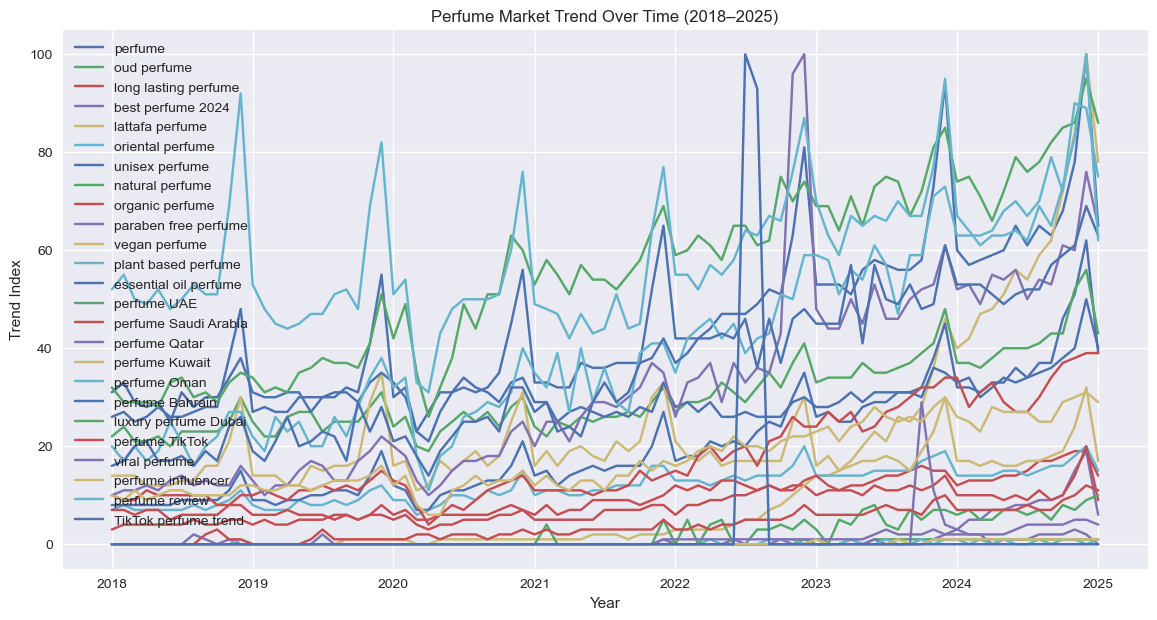

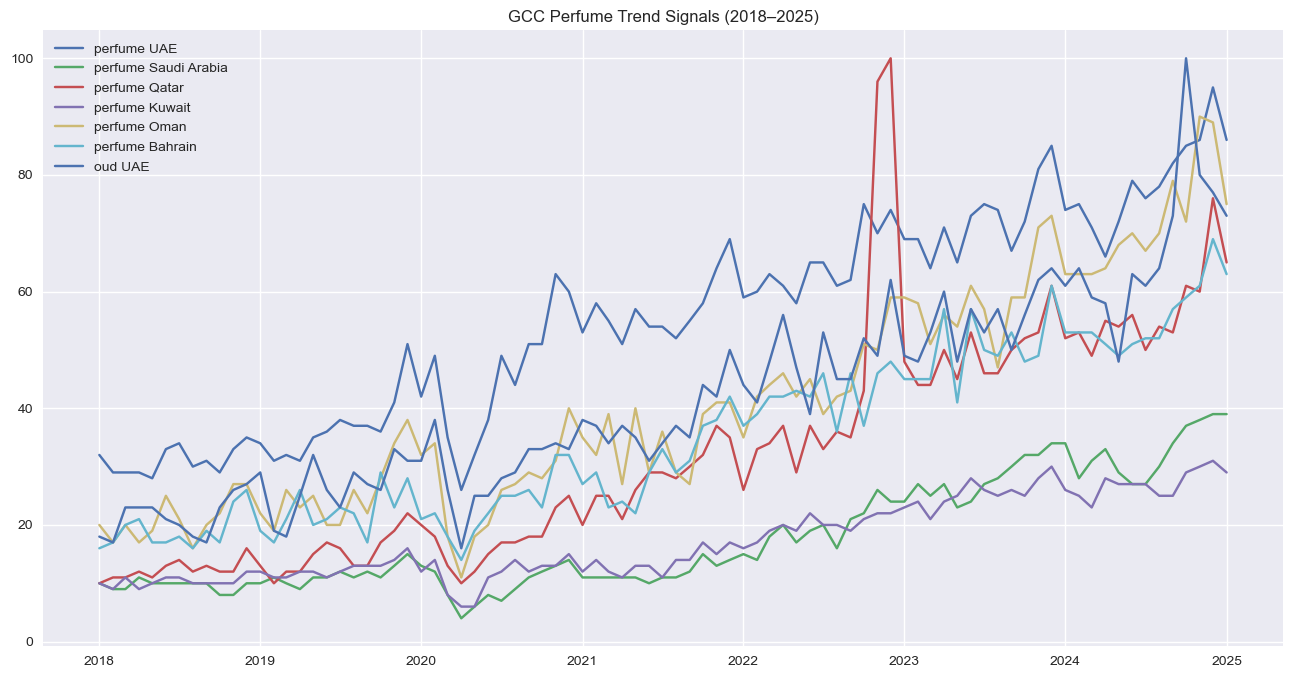

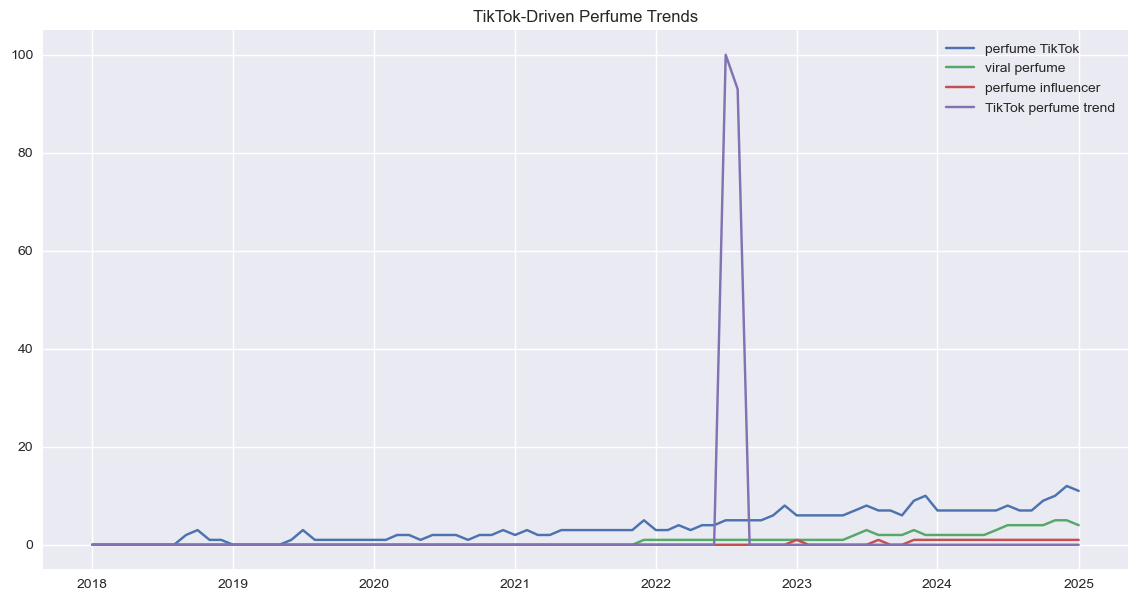

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# --- Correlation Heatmap ---
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Among Perfume Trend Keywords", fontsize=18)
plt.show()

# --- General Perfume Demand Trends ---
general_keywords = [col for col in df.columns if "perfume" in col.lower()]
plt.figure(figsize=(14,7))
for col in general_keywords:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title("Perfume Market Trend Over Time (2018–2025)")
plt.xlabel("Year")
plt.ylabel("Trend Index")
plt.show()

# --- GCC-Specific Trends ---
gcc_keywords = [col for col in df.columns if any(c in col for c in ["UAE","Saudi","Qatar","Oman","Bahrain","Kuwait"])]
plt.figure(figsize=(16,8))
for col in gcc_keywords:
    plt.plot(df.index, df[col], label=col)
plt.title("GCC Perfume Trend Signals (2018–2025)")
plt.legend()
plt.show()

# --- TikTok Influence Trends ---
tiktok_keywords = [col for col in df.columns if any(c in col.lower() for c in ["tiktok","viral","influencer"])]
plt.figure(figsize=(14,7))
for col in tiktok_keywords:
    plt.plot(df.index, df[col], label=col)
plt.title("TikTok-Driven Perfume Trends")
plt.legend()
plt.show()
